<a href="https://colab.research.google.com/github/MarinaTaques/Marina_Portfolio/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importando base de dados

In [8]:
dados = pd.read_csv('tips.csv')

In [9]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [10]:
gorjetas = dados.rename(columns={'total_bill':'valor_da_conta', 'tip': 'gorjeta', 'dessert': 'sobremesa', 'day':'dia_da_semana', 'time': 'hora_do_dia', 'size':'total_de_pessoas'})

In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map({'No' : 'Não', 'Yes': 'Sim'})

In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map({'Sun': 'Domingo', 'Sat' : 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'})

In [16]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})

In [18]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise 1 - Valor da conta e gorjeta

In [19]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

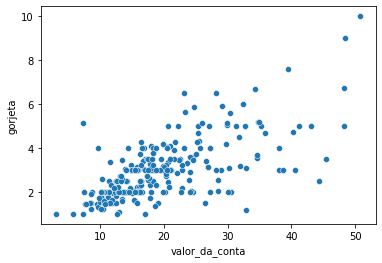

In [20]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

** Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta **

In [21]:
print('A base de dados contém {} registros.'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count

A base de dados contém 244 registros.
Registros não nulos


<bound method DataFrame.count of      valor_da_conta  gorjeta sobremesa dia_da_semana hora_do_dia  \
0             16.99     1.01       Não       Domingo      Jantar   
1             10.34     1.66       Não       Domingo      Jantar   
2             21.01     3.50       Não       Domingo      Jantar   
3             23.68     3.31       Não       Domingo      Jantar   
4             24.59     3.61       Não       Domingo      Jantar   
..              ...      ...       ...           ...         ...   
239           29.03     5.92       Não        Sábado      Jantar   
240           27.18     2.00       Sim        Sábado      Jantar   
241           22.67     2.00       Sim        Sábado      Jantar   
242           17.82     1.75       Não        Sábado      Jantar   
243           18.78     3.00       Não        Quinta      Jantar   

     total_de_pessoas  
0                   2  
1                   3  
2                   3  
3                   2  
4                   4  
..    

## Criando o campo porcentagem

In [22]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [23]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']).round(2)

In [24]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


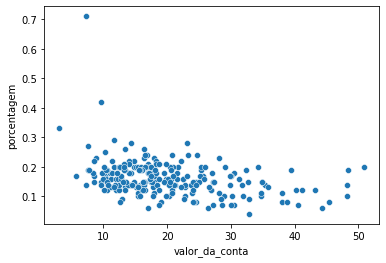

In [25]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

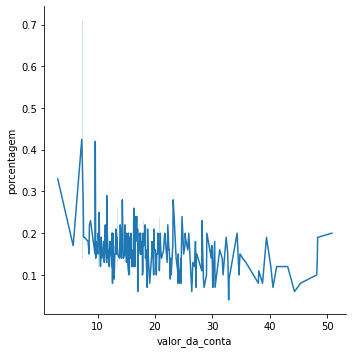

In [26]:
porcentagem_conta_liha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

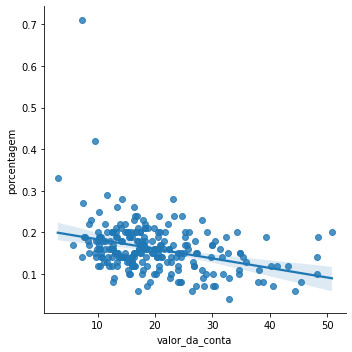

In [27]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

[Text(0, 0.5, 'Valor da gorjeta'), Text(0.5, 0, 'Valor da conta')]

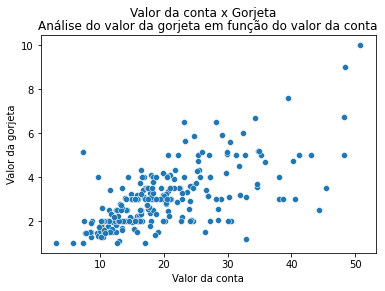

In [28]:
primeiro_plot = sns.scatterplot(x='total_bill', y='tip', data=dados)
primeiro_plot.figure.suptitle('Valor da conta x Gorjeta')
primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

In [29]:
imagem = primeiro_plot.get_figure()
imagem.savefig('imagem.png')

# Análise 2 -  Sobremesa

In [30]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [31]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [32]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


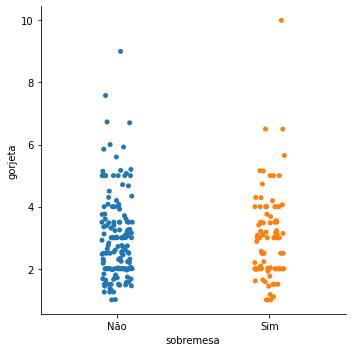

In [33]:
sns.catplot(x = 'sobremesa', y='gorjeta', data = gorjetas)

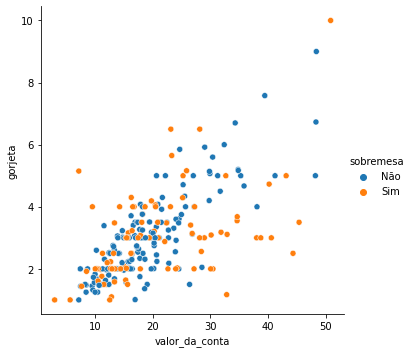

In [34]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

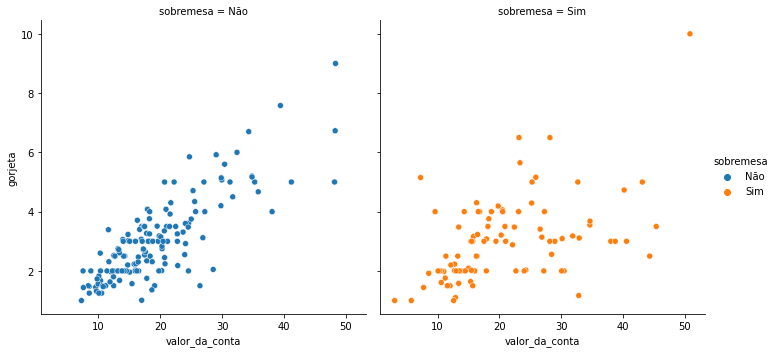

In [35]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

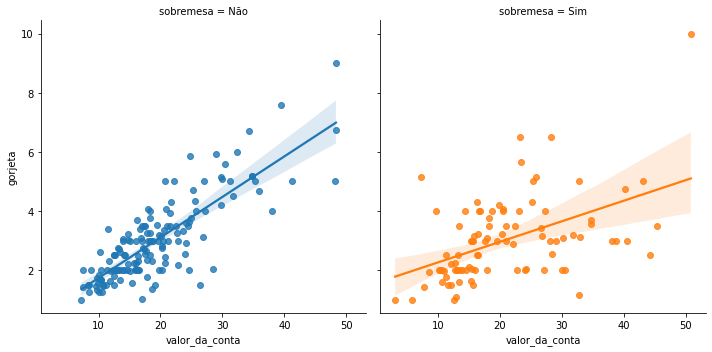

In [36]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col='sobremesa', hue = 'sobremesa', data= gorjetas)

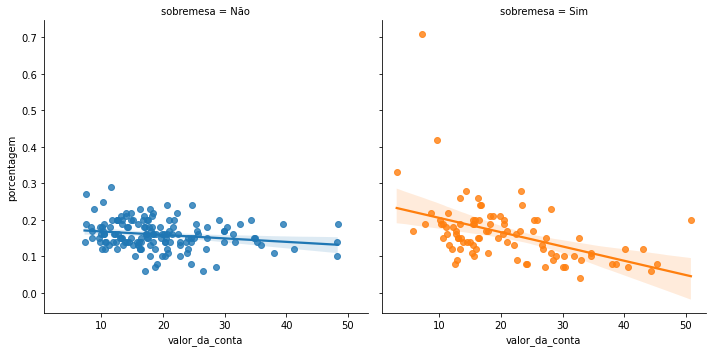

In [37]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col='sobremesa', hue = 'sobremesa', data= gorjetas)

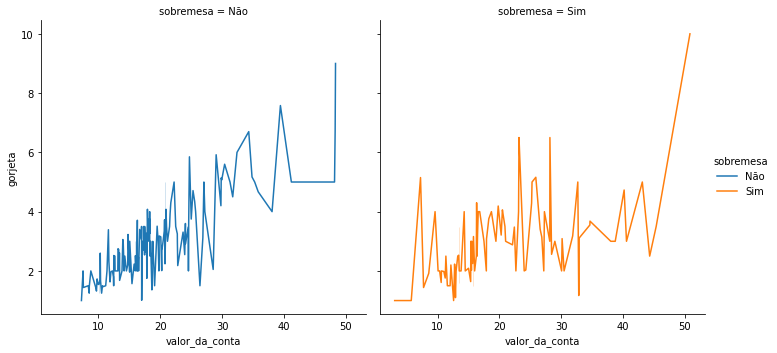

In [38]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col='sobremesa', hue = 'sobremesa', kind='line', data= gorjetas)

** Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa **

## Teste de hipótese


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**


In [39]:
from scipy.stats import ranksums

In [40]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [41]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [42]:
r = ranksums(sobremesa, sem_sobremesa)

In [43]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 -  Dia da semana

In [44]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [45]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

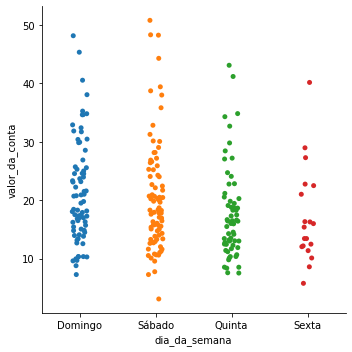

In [48]:
sns.catplot(x='dia_da_semana', y= 'valor_da_conta', data = gorjetas)

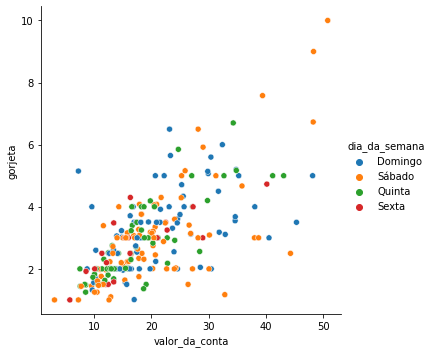

In [51]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

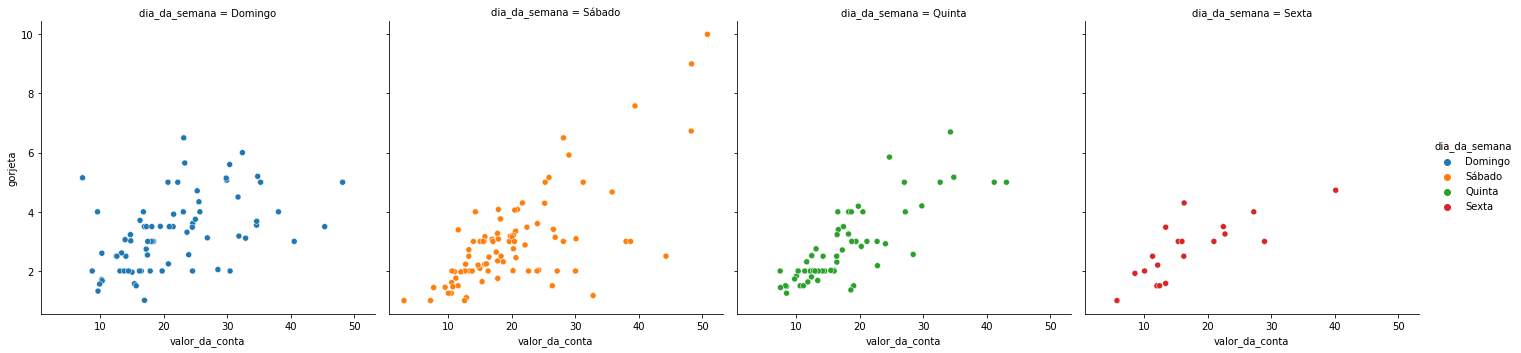

In [53]:
sns.relplot(x='valor_da_conta', y= 'gorjeta', col = 'dia_da_semana', hue = 'dia_da_semana', data = gorjetas)

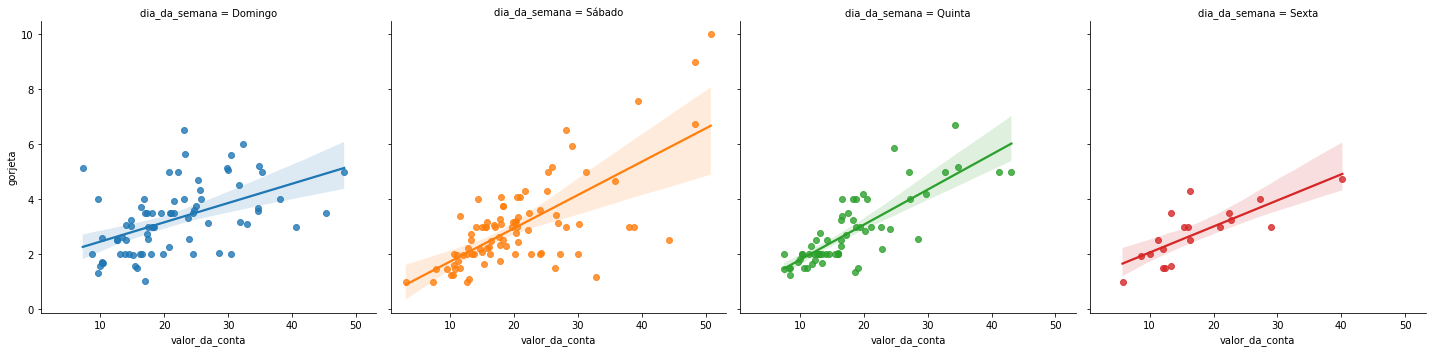

In [56]:
sns.lmplot(x='valor_da_conta', y= 'gorjeta', col = 'dia_da_semana', hue = 'dia_da_semana', data = gorjetas)

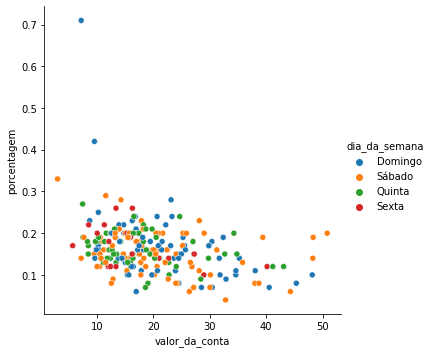

In [52]:
sns.relplot(x='valor_da_conta', y= 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

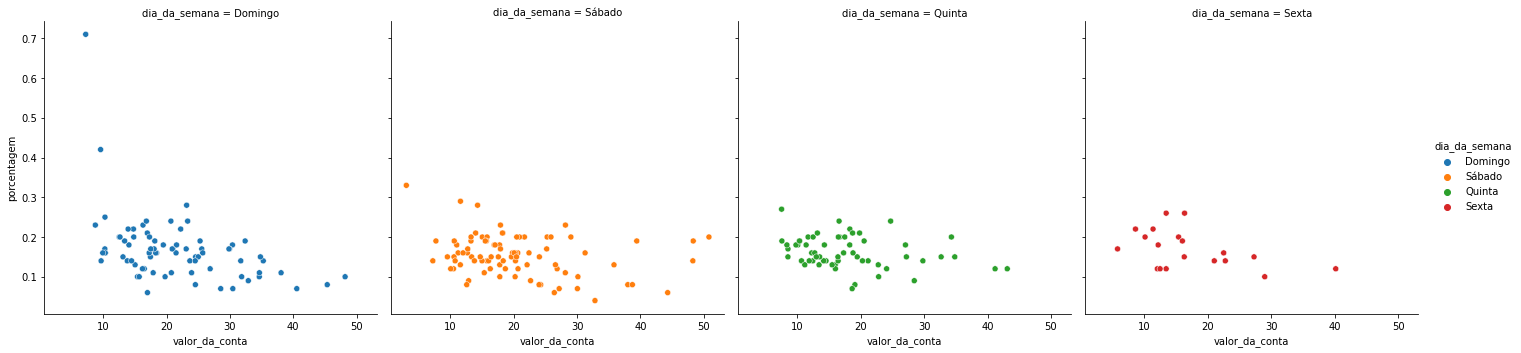

In [55]:
sns.relplot(x='valor_da_conta', y= 'porcentagem', col = 'dia_da_semana', hue = 'dia_da_semana', data = gorjetas)

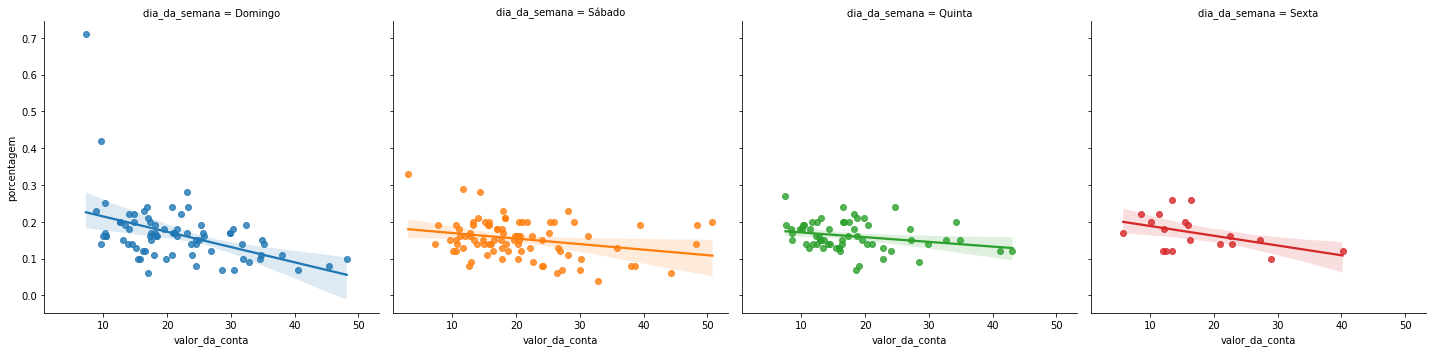

In [57]:
sns.lmplot(x='valor_da_conta', y= 'porcentagem', col = 'dia_da_semana', hue = 'dia_da_semana', data = gorjetas)

In [60]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [61]:
print('A média geral das gorjetas é de {} '.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902 


In [63]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [67]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [75]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [76]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [82]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


In [79]:
# p é maior que 0.05, então continuamos com a hipótese nula

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

In [83]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


# Anáise 4 - Hora do Dia

In [84]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

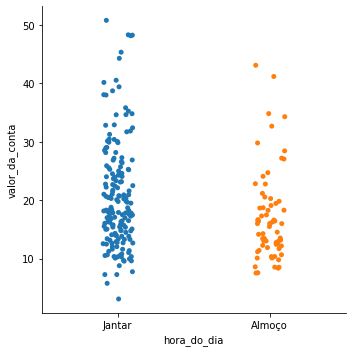

In [85]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

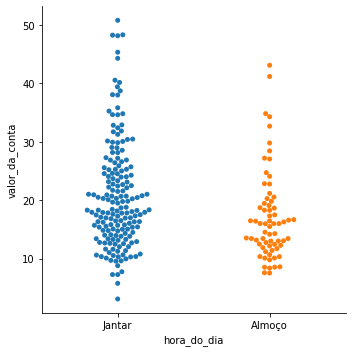

In [88]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind='swarm', data = gorjetas)

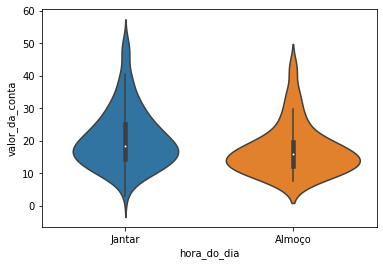

In [89]:
sns.violinplot(x='hora_do_dia', y= 'valor_da_conta', data = gorjetas)

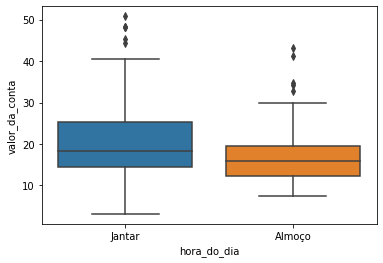

In [90]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [93]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


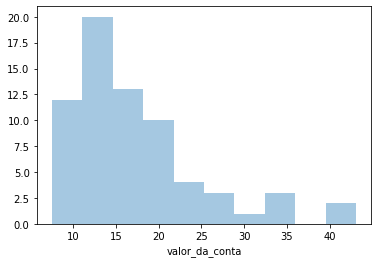

In [98]:
sns.distplot(almoco, kde=False)

In [96]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


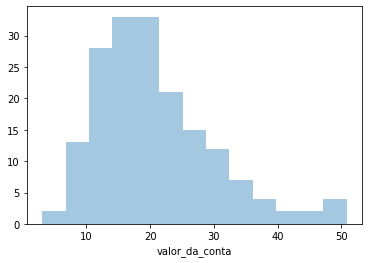

In [99]:
sns.distplot(jantar, kde = False)

In [101]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [105]:
r3 = ranksums(jantar, almoco)

In [106]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

### Outra hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [109]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [110]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [112]:
r4 = ranksums(porcentagem_jantar, porcentagem_almoco)

In [114]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**